# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | old town
Processing Record 2 of Set 1 | boguchany
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | san jose
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | barra de santo antonio
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | al ghayzah
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | nynashamn
Processing Record 16 of Set 1 | port saint john's
Processing Record 17 of Set 1 | brisas de zicatela
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | tralee
Processing Rec

Processing Record 41 of Set 4 | alamosa
Processing Record 42 of Set 4 | rongelap
Processing Record 43 of Set 4 | merizo village
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | fort irwin
Processing Record 46 of Set 4 | vilyuysk
Processing Record 47 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 48 of Set 4 | alice springs
Processing Record 49 of Set 4 | weno
Processing Record 0 of Set 5 | udachny
Processing Record 1 of Set 5 | korocha
Processing Record 2 of Set 5 | kristiansund
Processing Record 3 of Set 5 | hermanus
Processing Record 4 of Set 5 | khargone
Processing Record 5 of Set 5 | bel ombre
Processing Record 6 of Set 5 | mangai
Processing Record 7 of Set 5 | zinjibar
Processing Record 8 of Set 5 | taltal
Processing Record 9 of Set 5 | yuzhno-kurilsk
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | armenia
Processing Record 12 of Set 5 | kukmor
Processing Record 13 of Set 5 | miri
Processing Record 14 of Set 5 | kirkwoo

Processing Record 35 of Set 8 | horta
Processing Record 36 of Set 8 | luang namtha
Processing Record 37 of Set 8 | saratamata
City not found. Skipping...
Processing Record 38 of Set 8 | gunjur
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | mwinilunga
Processing Record 41 of Set 8 | puerto rico
Processing Record 42 of Set 8 | ronne
Processing Record 43 of Set 8 | ozalp
Processing Record 44 of Set 8 | elko
Processing Record 45 of Set 8 | san carlos
Processing Record 46 of Set 8 | remire-montjoly
Processing Record 47 of Set 8 | nagahama
Processing Record 48 of Set 8 | la foa
Processing Record 49 of Set 8 | richards bay
Processing Record 0 of Set 9 | al-hamdaniya
Processing Record 1 of Set 9 | roma
Processing Record 2 of Set 9 | alaghsas
Processing Record 3 of Set 9 | acarau
Processing Record 4 of Set 9 | kuala terengganu
Processing Record 5 of Set 9 | santa isabel
Processing Record 6 of Set 9 | kidal
Processing Record 7 of Set 9 | kalyandurg
Processing Recor

Processing Record 23 of Set 12 | west bay
Processing Record 24 of Set 12 | itaituba
Processing Record 25 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 26 of Set 12 | assesse
Processing Record 27 of Set 12 | noumea
Processing Record 28 of Set 12 | sao paulo de olivenca
Processing Record 29 of Set 12 | tangalle
Processing Record 30 of Set 12 | khovd
Processing Record 31 of Set 12 | potosi
Processing Record 32 of Set 12 | den burg
Processing Record 33 of Set 12 | island harbour
Processing Record 34 of Set 12 | gisborne
Processing Record 35 of Set 12 | hafar al-batin
Processing Record 36 of Set 12 | diego de almagro
Processing Record 37 of Set 12 | ilha de mocambique
Processing Record 38 of Set 12 | kirkland lake
Processing Record 39 of Set 12 | bascov
Processing Record 40 of Set 12 | harstad
Processing Record 41 of Set 12 | lobujya
Processing Record 42 of Set 12 | jumla
Processing Record 43 of Set 12 | nouadhibou
Processing Record 44 of Set 12 | prado
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,old town,50.0870,14.4202,6.37,74,40,6.69,CZ,1706310711
1,boguchany,58.3814,97.4531,-22.30,100,95,0.89,RU,1706310711
2,port-aux-francais,-49.3500,70.2167,6.71,95,81,14.95,TF,1706310711
3,karratha,-20.7377,116.8463,25.50,77,7,6.36,AU,1706310520
4,san jose,37.3394,-121.8950,18.20,57,100,2.06,US,1706310510


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,old town,50.0870,14.4202,6.37,74,40,6.69,CZ,1706310711
1,boguchany,58.3814,97.4531,-22.30,100,95,0.89,RU,1706310711
2,port-aux-francais,-49.3500,70.2167,6.71,95,81,14.95,TF,1706310711
3,karratha,-20.7377,116.8463,25.50,77,7,6.36,AU,1706310520
4,san jose,37.3394,-121.8950,18.20,57,100,2.06,US,1706310510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Below information pulled from https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
# Convert Date from Unix to UTC
from datetime import datetime
unix_timestamp = city_date
utc_time = datetime.utcfromtimestamp(unix_timestamp)
utc_date = utc_time.strftime("%Y-%m-%d (UTC)")
utc_date

'2024-01-26 (UTC)'

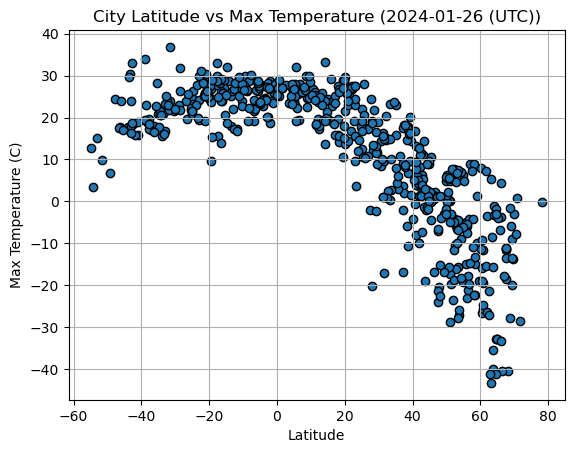

In [9]:
# Build scatter plot for latitude vs. temperature
lat_x = city_data_df["Lat"]
temp_y = city_data_df["Max Temp"]
plt.scatter(lat_x, temp_y, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({utc_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

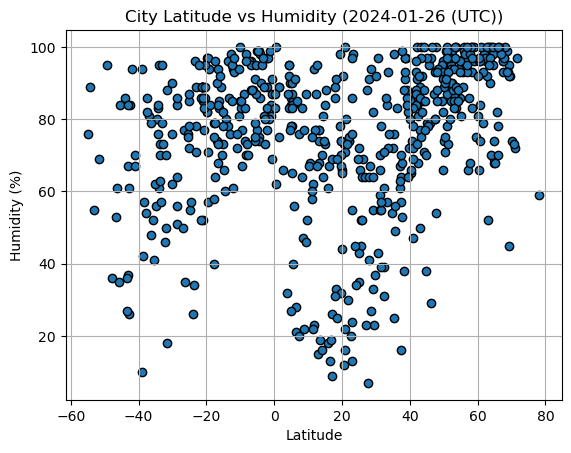

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity_y = city_data_df["Humidity"]
plt.scatter(lat_x, humidity_y, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({utc_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

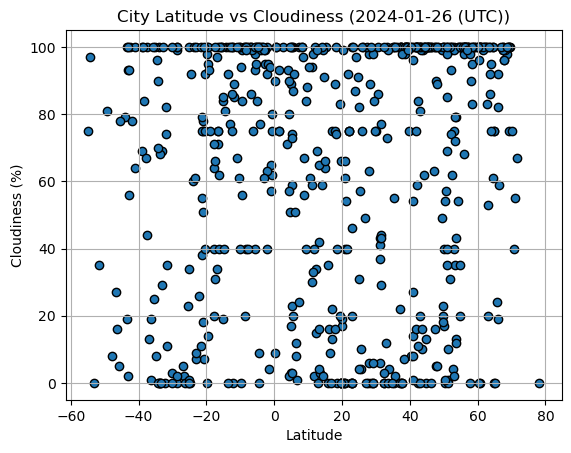

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloud_y = city_data_df["Cloudiness"]
plt.scatter(lat_x, cloud_y, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({utc_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

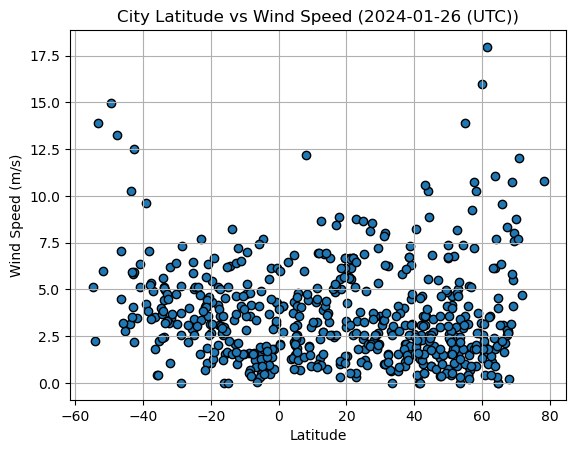

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_y = city_data_df["Wind Speed"]
plt.scatter(lat_x, wind_y, edgecolors = "black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({utc_date})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def reg_line(x_axis, y_axis):
    plt.scatter(x_axis, y_axis, edgecolors = "black")
    plt.xlabel("Latitude")
    plt.grid()
    res = linregress(x_axis, y_axis)  
    linreg = res.slope*x_axis+res.intercept
    plt.plot(x_axis, linreg, "r")
    show_eq = "y =" + str(round(res.slope, 2)) + "x +" + str(round(res.intercept,2))
    plt.annotate(show_eq, (x_axis.min()+30,y_axis.min()+5), color = "red", fontsize = 15)
    print(f"The r-value is: {res.rvalue}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,old town,50.0870,14.4202,6.37,74,40,6.69,CZ,1706310711
1,boguchany,58.3814,97.4531,-22.30,100,95,0.89,RU,1706310711
4,san jose,37.3394,-121.8950,18.20,57,100,2.06,US,1706310510
5,stanley,54.8680,-1.6985,6.27,86,20,3.60,GB,1706310711
6,vorgashor,67.5833,63.9500,-11.56,96,99,2.76,RU,1706310713


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,6.71,95,81,14.95,TF,1706310711
3,karratha,-20.7377,116.8463,25.50,77,7,6.36,AU,1706310520
8,isangel,-19.5500,169.2667,26.81,57,95,5.43,VU,1706310528
9,barra de santo antonio,-9.4047,-35.5072,27.60,83,56,7.02,BR,1706310714
10,adamstown,-25.0660,-130.1015,24.57,72,100,3.41,PN,1706310714


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8324396602897215


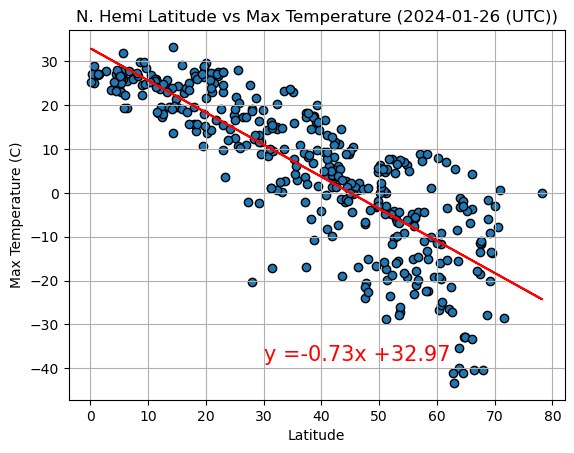

In [16]:
# Linear regression on Northern Hemisphere
northlat = northern_hemi_df["Lat"]
northtemp = northern_hemi_df["Max Temp"]
reg_line(northlat, northtemp)
plt.ylabel("Max Temperature (C)")
plt.title(f"N. Hemi Latitude vs Max Temperature ({utc_date})")
plt.show()

The r-value is: 0.4597942569017648


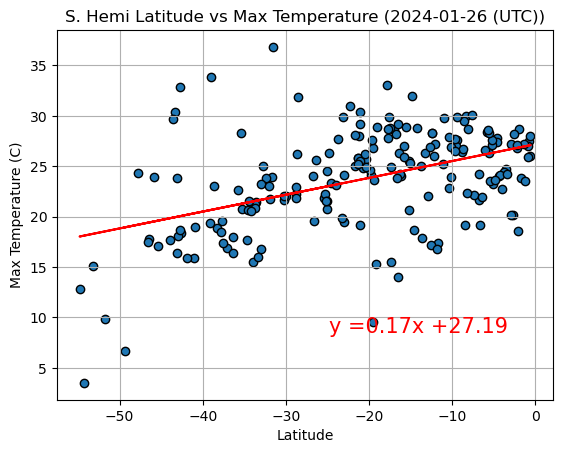

In [17]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
reg_line(x_axis, y_axis)
plt.ylabel("Max Temperature (C)")
plt.title(f"S. Hemi Latitude vs Max Temperature ({utc_date})")
plt.show()

**Discussion about the linear relationship:** 

The regression line models the relation between the latitude and the maximum temperature in degrees Celsius for a given city while minimizing the size of the residuals, which are calculated by finding the difference between the actual temperature and the predicted temperature for each latitude.

In the Northern Hemisphere, the r-value is less than -0.8, indicated a very strong negative correlation between latitude and predicted temperature.  Therefore, as we move away from the equator, we can be confident that the temperature will decrease.  This is likely being amplified by the fact that the data has been retrieved during the Northern Hemisphere winter.

In the Southern Hemisphere, the r-value is near 0.5, indicating there is a moderate  positive correlation between latitude and maximum temperature.  Therefore, as we move towards the equator, we can expect that there will be warmer temperatures.  But, this residual indicates there are likely other confounding variables influencing the maximum temperature of the cities.

The y-intercepts for both equations are within a few degrees of 30 degrees Celsius.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4377222560523855


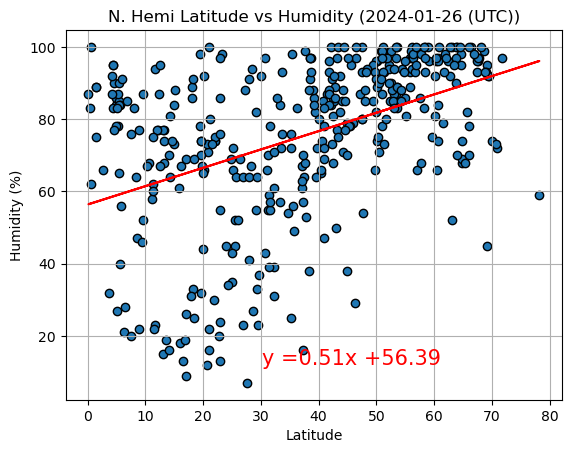

In [18]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
reg_line(x_axis, y_axis)
plt.ylabel("Humidity (%)")
plt.title(f"N. Hemi Latitude vs Humidity ({utc_date})")
plt.show()

The r-value is: 0.4604655237353467


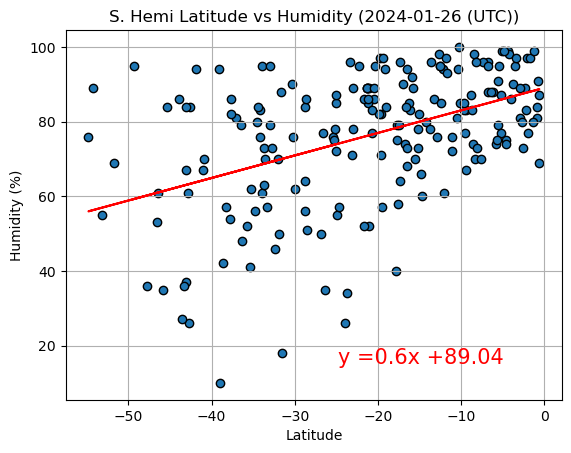

In [19]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
reg_line(x_axis, y_axis)
plt.ylabel("Humidity (%)")
plt.title(f"S. Hemi Latitude vs Humidity ({utc_date})")
plt.show()

**Discussion about the linear relationship:** 
The regression line models the relation between the latitude and percent humidity for a given city.

For both regression models, we have r-values near 0.45, indicated a moderate positive association between latitude and humidity.  However, the Northern Hemisphere model predicts 56% humidity near the equator, while the Southern Hemisphere model predicts 89% humidity near the equator.  As such, there must be other confounding variables influencing the humidity beyond just latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22314693970255073


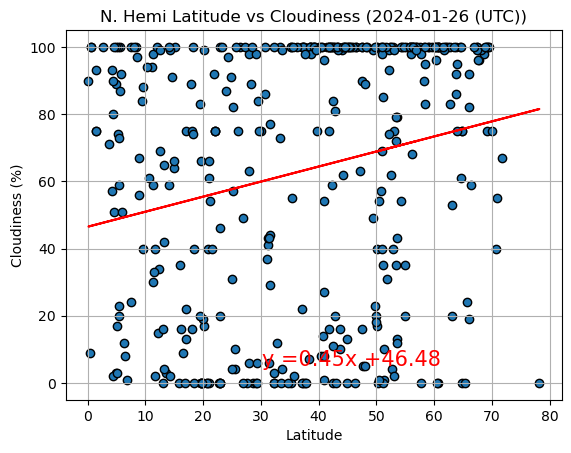

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
reg_line(x_axis, y_axis)
plt.ylabel("Cloudiness (%)")
plt.title(f"N. Hemi Latitude vs Cloudiness ({utc_date})")
plt.show()

The r-value is: 0.25967296361663716


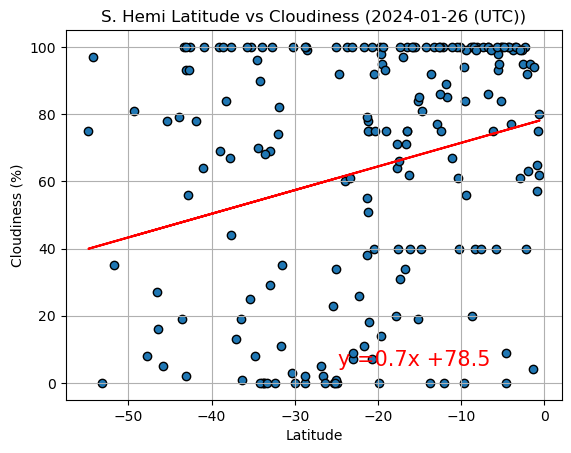

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
reg_line(x_axis, y_axis)
plt.ylabel("Cloudiness (%)")
plt.title(f"S. Hemi Latitude vs Cloudiness ({utc_date})")
plt.show()

**Discussion about the linear relationship:** 
The regression line models the relation between the latitude and the cloudiness around the location.  

Both models have r-values near 0.25, indicating a weak positive correlation between latitude and cloudiness.  The Northern Hemisphere plot predicts cloudiness around the equator to be 46%, while the Southern Hemisphere plot predicts cloudiness around the equator to be around 78%.  There is strong evidence that there is a confounding variable that is impacting cloudiness.

Both plots have a % cloudiness ranging from 0 to 100%, with this type of range occurring at most latitudes, indicating high variability for this metric.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.036506660924680905


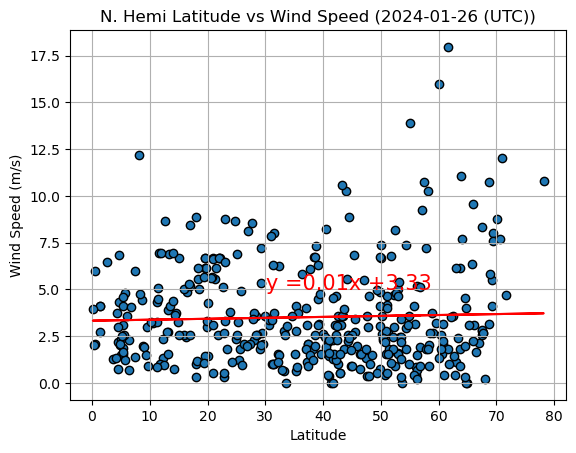

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
reg_line(x_axis, y_axis)
plt.ylabel("Wind Speed (m/s)")
plt.title(f"N. Hemi Latitude vs Wind Speed ({utc_date})")
plt.show()

The r-value is: -0.406251613356215


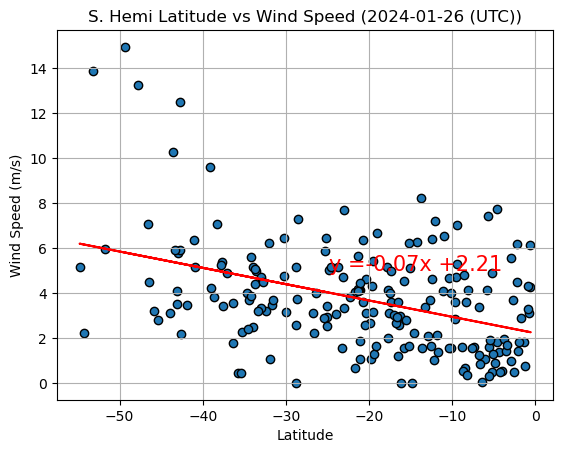

In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
reg_line(x_axis, y_axis)
plt.ylabel("Wind Speed (m/s)")
plt.title(f"S. Hemi Latitude vs Wind Speed ({utc_date})")
plt.show()

**Discussion about the linear relationship:** 
The regression line models the relation between the latitude and wind speed.  

The Northern Hemisphere has an r-value near 0, indicating that there is no relationship between latitude and wind speed.  The Southern Hemisphere has an r-value of -0.4, indicating a weak to moderate negative correlation between latitude and wind speed.  As such, there are other factors that are impacting wind speed beyond latitude.  Both plots indicate that most wind speeds across the whole domain fluctuate between 0 and 8 m/s.  

Both plots have a couple of locations having wind speeds greater than 10 m/s at locations 40-60 degrees from the equator.  There is only one other location across either graph with wind speeds greater than 10 m/s, at near 10 degrees latitude in the Northern Hemisphere.